In [1]:
# Course: DSC 550-T302 Data Mining
# Week: 12
# Term Project: Final Project Submission
# Author: Surena Nokham
# Date: 11/18/2023

## Table of Contents 
- Double click on the links below to jump to specific sections within the notebook

[Milestone_1](#Milestone_1)

[Milestone_2](#Milestone_2)

[Milestone_3](#Milestone_3)

[Updated_Content](#Updated_Content)

# Milestone 1 - Data Selection and EDA <a id="Milestone_1"></a>

In the world of retail, employee satisfaction and retention play a crucial role in achieving long-term success. Walmart, a global retail powerhouse renowned for its everyday low prices, extensive product selection, convenience, innovation, charitable initiatives, and supply chain efficiency, has grown to become one of the world's largest employers. This vast workforce brings with it a unique set of challenges and issues that are commonly encountered by major corporations. One primary challenge, which Walmart shares with many others, is the preservation of employee satisfaction and retention.

Highlighting their significance, content and fulfilled employees are not only more productive but also less likely to seek opportunities elsewhere. It is vital for companies to understand the significance of employee satisfaction and retention.  Satisfied employees are less likely to leave their jobs, reducing the need for employers to invest time and money in replacement. Cultivating this symbiotic relationship is mutually beneficial, and it underscores why Walmart should invest in understanding the factors that contribute to employee satisfaction in the workplace.

For my milestone project, I have chosen to analyze a dataset that contains employee reviews from Walmart. The target for my analysis and predictive model will be achieved through sentiment analysis. For sentiment analysis, I will use a Logistic Regression model, a type of Natural Language Processing (NLP) model, such as TextBlob, to classify each employee review as positive, negative, or neutral. This choice of model allows for interpretability and efficiency, making it suitable for deriving actionable insights from the Walmart employee review dataset.

Through this approach, Walmart will gain a better understanding of their workforce, enhance their employee satisfaction, improve retention, and have a competitive advantage against other competitors in the retail industry.

In [2]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from IPython.display import Image

In [3]:
# Load dataset
df = pd.read_csv("walmart_employee_review.csv")
df.head()

,title,review,rating,status,position,location,date_posted,year,month,day
0,great place to work,Indeed Featured reviewThe most useful review s...,4,Former Employee,"CUSTOMER SERVICE SUPERVISOR, OVER-NIGHT","El Paso, TX 79904",3/23/18,2018,3,23
1,No Title,it was good pay but they can definitely start ...,5,Former Employee,Shopper Team Member,"Baton Rouge, LA",8/11/23,2023,8,11
2,Decent,Decent place to work at if you have good manag...,4,Current Employee,Stocking Associate,Colorado,8/11/23,2023,8,11
3,It's retail,"It's a retail job with all the drama, lack of ...",3,Former Employee,Deli Worker,Pennsylvania,8/11/23,2023,8,11
4,"not too strict , laid back job","pretty good job , pretty easy and good pay for...",4,Former Employee,OPD Associate,"San Antonio, TX",8/11/23,2023,8,11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221600 entries, 0 to 221599
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        221600 non-null  object
 1   review       221600 non-null  object
 2   rating       221600 non-null  int64 
 3   status       221600 non-null  object
 4   position     221600 non-null  object
 5   location     221600 non-null  object
 6   date_posted  221600 non-null  object
 7   year         221600 non-null  int64 
 8   month        221600 non-null  int64 
 9   day          221600 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 16.9+ MB


In [5]:
df.isna().sum()

title          0
review         0
rating         0
status         0
position       0
location       0
date_posted    0
year           0
month          0
day            0
dtype: int64

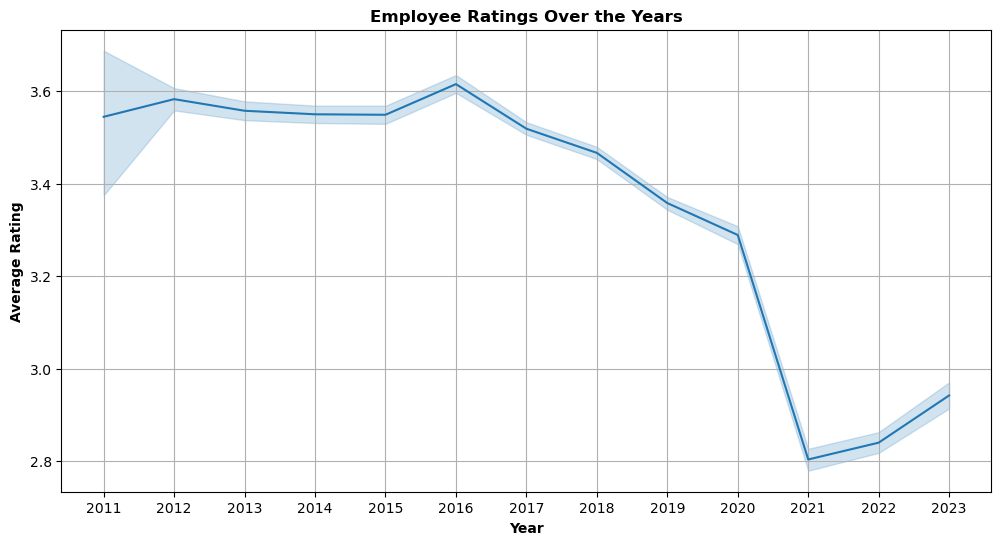

In [6]:
# Create line graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='rating')
plt.title('Employee Ratings Over the Years', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Average Rating', fontweight='bold')

# Set the x-axis ticks to show all years from 2011 to 2023
plt.xticks(range(2011, 2024))

# View chart
plt.grid(True)
plt.show()

The average employee rating is steady until 2016, where we start to see a downward trend. Further investigation could be done to see if there was a drastic change that occurred in 2016 to cause ratings to go down. 

This trend dramatically drops in 2020, which could be attributed to the global pandemic. After 2021, we start to see average ratings rise again as the world goes back to a state of norm. 

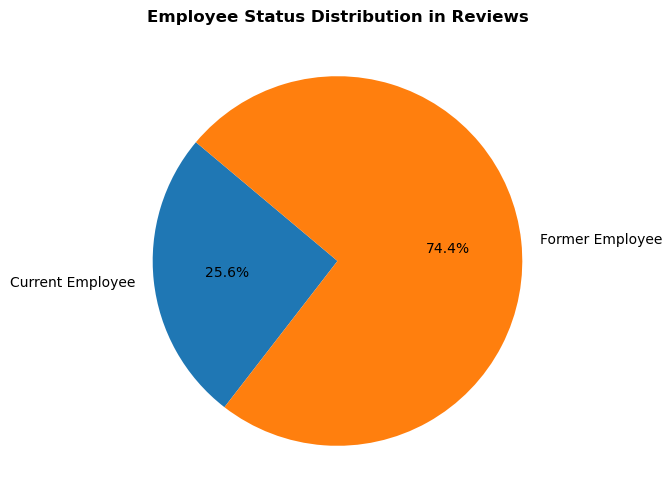

<Figure size 640x480 with 0 Axes>

In [7]:
# Calculate the counts of current and former employees
current_count = len(df[df['status'] == 'Current Employee'])
former_count = len(df[df['status'] == 'Former Employee'])

# Create data for the pie chart
status_labels = ['Current Employee', 'Former Employee']
status_counts = [current_count, former_count]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_labels, autopct='%1.1f%%', startangle=140)
plt.title('Employee Status Distribution in Reviews', fontweight='bold')

# Display the pie chart
plt.show()

# Save the figure
plt.savefig('emply_status_dist.png', dpi=300, bbox_inches='tight')

The majority of reviews comes from former employees. It could indicate the company has a high turnover rate and the individuals who have left the company are more motivated to share their experiences, especially if they're negative. A smaller percentage of current employees left reviews which could be indicative of a lack of interest in sharing opinions. Because of this, an imbalance could be the result of sampling and review bias.

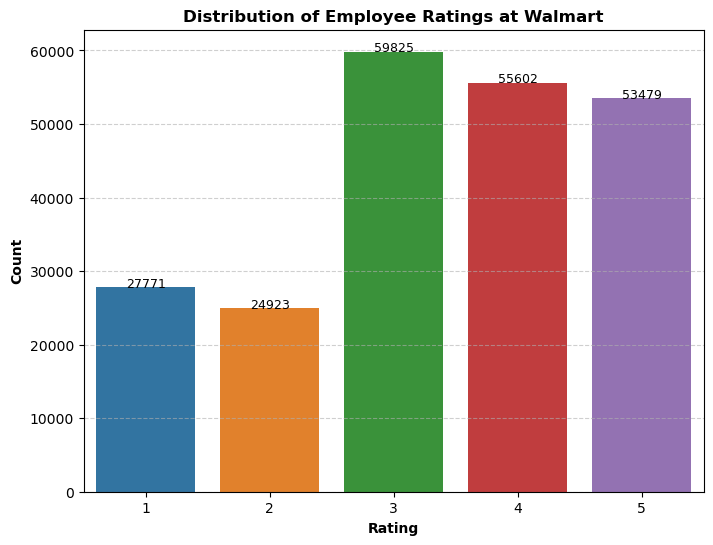

<Figure size 640x480 with 0 Axes>

In [8]:
# Extract rating column
ratings = df['rating']

# Create a histogram
plt.figure(figsize=(8, 6))
top_values = df['rating'].value_counts()
plt.title('Distribution of Employee Ratings at Walmart', fontweight='bold')
plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add counts above bars
ax = sns.barplot(x=top_values.index, y=top_values.values)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=9)

# View histogram
plt.show()

# Save the figure
plt.savefig('emply_dist_ratings.png', dpi=300, bbox_inches='tight')

The majority of employee review ratings fall within the range of 3 and above. This indicates employees are moderately to highly satisfied at Walmart. Overall, having higher ratings could mean a generally, positive work environment. 

In [9]:
# Extract review column
titles = df['title']

# Join all reviews into a single string
text = ' '.join(title for title in titles)

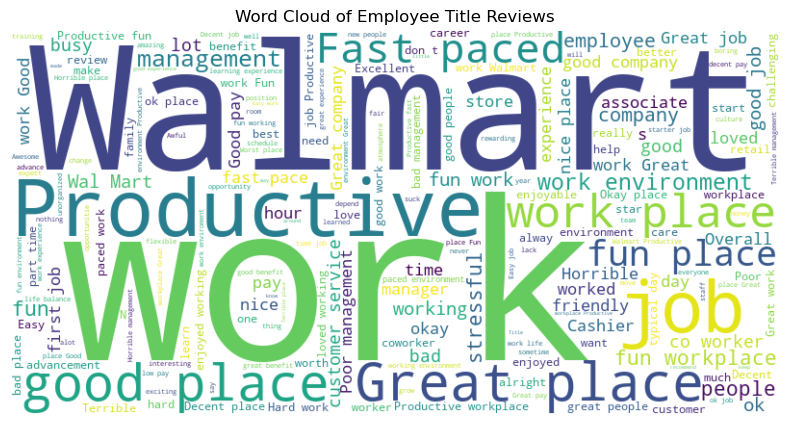

In [10]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# View word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Employee Title Reviews')
plt.show()

At a glance, the overall tone of this word cloud seem to indicate the reviews will focus heavily on the workplace environment. Besides "Walmart", "work" and "productive" is frequently used in the titles of these employee reviews as seen from the size of the word. We also see Walmart described as a great/good place to work for and aligns with what we saw from the previous chart. We can also infer from the size of the word "management",  this will also be a topic heavily discussed in the reviews.

In [11]:
# Extract review column
reviews = df['review']

# Join all reviews into a single string
text = ' '.join(review for review in reviews)

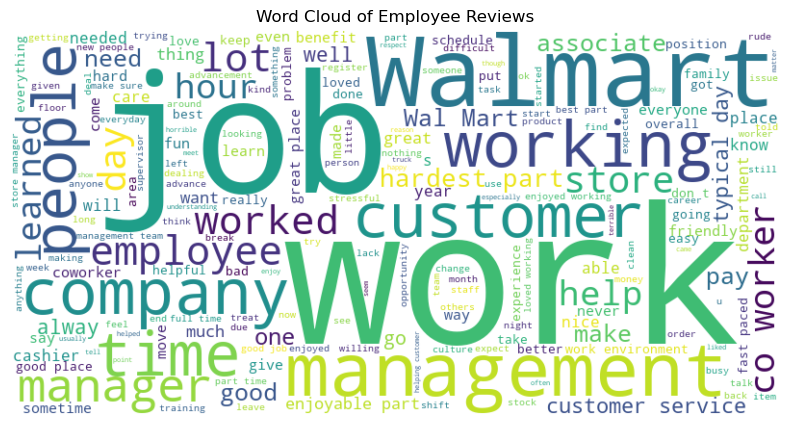

<Figure size 640x480 with 0 Axes>

In [12]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# View word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Employee Reviews')
plt.show()

# Save the figure
plt.savefig('word_cloud.png', dpi=300, bbox_inches='tight')

From this word cloud, we can see a large amount of reviews focus around the work, management, the company, people, the job, and time. This aligns with the previous word cloud where management is a large focus of the reviews. This cloud can be utilized to gain better insights on what employees find important to leave reviews on.

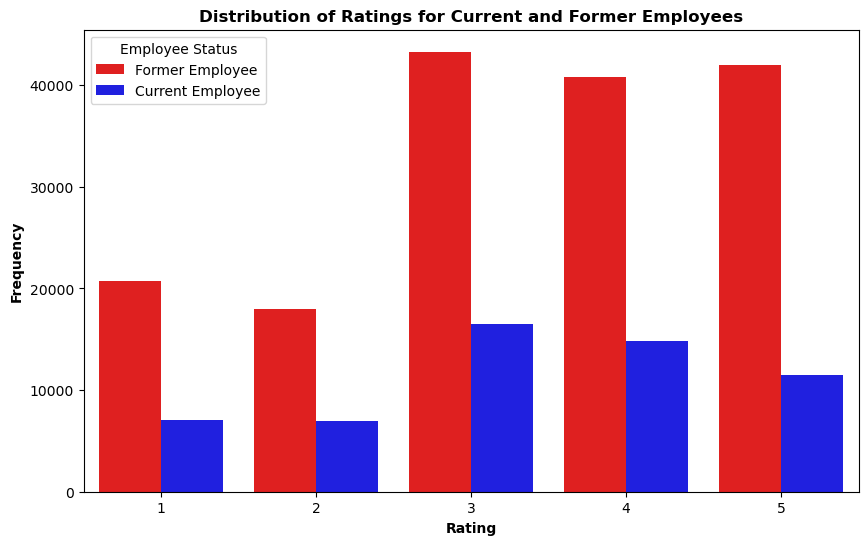

In [13]:
# Create comparison bar graph
plt.figure(figsize=(10, 6))
status_colors = {'Current Employee': 'blue', 'Former Employee': 'red'}
sns.countplot(data=df, x='rating', hue='status', palette=status_colors)
plt.title('Distribution of Ratings for Current and Former Employees', fontweight='bold')
plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')


# Show the chart
plt.legend(title='Employee Status')
plt.show()

This graph aligns with what we saw in our pie chart where the majority of the ratings come from former employees. This seemingly indicates a significant amount of individuals have left the company on good terms and have rated working for Walmart very high. Walmart could utilize this information to entice future, potential employees to show how well employees have enjoyed working there. 

# Milestone 2 - Data Preparation <a id="Milestone_2"></a>

In [14]:
# Load libraries
import re
import string
import re
from sklearn.preprocessing import OneHotEncoder
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
# Load dataset
df = pd.read_csv("walmart_employee_review.csv")
df.shape

(221600, 10)

In [16]:
# Get summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221600 entries, 0 to 221599
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        221600 non-null  object
 1   review       221600 non-null  object
 2   rating       221600 non-null  int64 
 3   status       221600 non-null  object
 4   position     221600 non-null  object
 5   location     221600 non-null  object
 6   date_posted  221600 non-null  object
 7   year         221600 non-null  int64 
 8   month        221600 non-null  int64 
 9   day          221600 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 16.9+ MB


- Check for missing values. There are none in the dataset.

In [17]:
# Remove any duplicates
df_no_duplicates = df.drop_duplicates()
df.shape

(221600, 10)

- Check and remove duplicates to ensure data accuracy and consistency for later analysis.

In [18]:
# Create list of column names to delete
delete_columns = ['year', 'month', 'day'] 

In [19]:
# Delete specified columns
df = df.drop(columns=delete_columns, axis=1)

In [20]:
df = df.drop(columns='title', axis=1)

- The year, month, and day columns were removed since we already have a 'date_posted' column. There is no need to keep these additional columns since they are redundant information.
- The "title" column was removed because I did not think it would contribute significantly to the sentiment analysis I plan to do later. While it could provide context, I am more interested in the review text itself.

In [21]:
# Convert the date posted column to a standardized date format
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%m/%d/%y')

- The "date_posted" column was converted from the 'month/day/year' format to 'YYYY-MM-DD' format, which is a standardized format suitable for data analysis. This ensures data consistency and will make it easier to perform analysis later.

In [22]:
# Filter df to keep date between 2013 to 2023
start_date = pd.to_datetime('2013-01-01')
end_date = pd.to_datetime('2023-12-31')
df = df[(df['date_posted'] >= start_date) & (df['date_posted'] <= end_date)]

- Dataframe was filtered to only keep posts from 2013 to 2023. Although the dataset has posts dating all the way to 2011, I only wanted to look at the past ten years to keep things manageable. 

In [23]:
# Function to parse and clean the 'location' column
def clean_location(location_str):
    # Remove integers and commas
    # Convert to lowercase
    cleaned_location = ''.join(char for char in location_str if not char.isdigit() and char != ',').lower()
    return cleaned_location

# Apply the function to the 'location' column
df['location'] = df['location'].apply(clean_location)

In [24]:
# Lowercase all the columns
df["position"] = df["position"].str.lower()
df["review"] = df["review"].str.lower()

- The "location" column was parsed to remove integers (address and postal code) and commas. 
- All applicable columns were converted to lowercase for consistency.

In [25]:
# Positive (Ratings of 4-5)
# Neutral (Ratings of 2-3)
# Negative (Rating of 1)

df['rating'].replace({1: 2, 2: 1, 3: 1, 4: 0, 5: 0}, inplace=True)

In [26]:
# Converting Rating field from float to int
df.rating = df.rating.astype(float).astype(int)

- Coverting 5 ratings into 3 classes.

In [27]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the "status" column
encoded_data = encoder.fit_transform(df[["status"]])

# Get column names for the encoded data
encoded_columns = encoder.get_feature_names_out(["status"])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Concatenate the encoded df with original df
df = pd.concat([df, encoded_df], axis=1)

In [28]:
# Drop status column
df = df.drop(columns='status', axis=1)

- The "status" column is considered categorical data so one-hot encoding was applied to represent it numerically. Once the new binary columns were created, the original "status" column was dropped to prevent extra noise in the dataset.

In [29]:
# Create a dictionary to map abbreviated states to full names
state_abbreviations = {
    'al': 'alabama',
    'ak': 'alaska',
    'az': 'arizona',
    'ar': 'arkansas',
    'ca': 'california',
    'co': 'colorado',
    'ct': 'connecticut',
    'de': 'delaware',
    'fl': 'florida',
    'ga': 'georgia',
    'hi': 'hawaii',
    'id': 'idaho',
    'il': 'illinois',
    'in': 'indiana',
    'ia': 'iowa',
    'ks': 'kansas',
    'ky': 'kentucky',
    'la': 'louisiana',
    'me': 'maine',
    'md': 'maryland',
    'ma': 'massachusetts',
    'mi': 'michigan',
    'mn': 'minnesota',
    'ms': 'mississippi',
    'mo': 'missouri',
    'mt': 'montana',
    'ne': 'nebraska',
    'nv': 'nevada',
    'nh': 'new hampshire',
    'nj': 'new jersey',
    'nm': 'new mexico',
    'ny': 'new york',
    'nc': 'north carolina',
    'nd': 'north dakota',
    'oh': 'ohio',
    'ok': 'oklahoma',
    'or': 'oregon',
    'pa': 'pennsylvania',
    'ri': 'rhode island',
    'sc': 'south carolina',
    'sd': 'south dakota',
    'tn': 'tennessee',
    'tx': 'texas',
    'ut': 'utah',
    'vt': 'vermont',
    'va': 'virginia',
    'wa': 'washington',
    'wv': 'west virginia',
    'wi': 'wisconsin',
    'wy': 'wyoming'
}

In [30]:
# Create function to replace state abbreviations with full names
def replace_state_abbreviations(location):
    # Split the location string into words
    words = location.split() 
    for i, word in enumerate(words):
        # Check if the word is in the state_abbreviations dictionary
        if word.lower() in state_abbreviations:
            # Replace the abbreviation
            words[i] = state_abbreviations[word.lower()]
    return ' '.join(words)  # Rejoin words

# Apply the function to the 'location' column
df["location"] = df["location"].apply(replace_state_abbreviations)

- A function was created to loop through the "location" column and replace all state abbreviations with the full state name.

In [31]:
# Create function to categorize position column
def replace_supervisor_titles(title):
    lowercase_title = title.lower()
    if "chief" in lowercase_title or "officer" in lowercase_title or "president" in lowercase_title:
        return "executive"
    if "executive" in lowercase_title or "director" in lowercase_title or "chairman" in lowercase_title:
        return "executive"
    if "supervisor" in lowercase_title or "manager" in lowercase_title:
        return "management"
    else:
        return "non-management"

# Apply the function to the "position" column
df["position"] = df["position"].apply(replace_supervisor_titles)

In [32]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the "status" column
encoded_data = encoder.fit_transform(df[["position"]])

# Get column names for the encoded data
encoded_columns = encoder.get_feature_names_out(["position"])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Concatenate the encoded df with original df
df = pd.concat([df, encoded_df], axis=1)

- I categorized the job roles in the "position" column into three main categories: "management", "non-management", and "executive" to simplify and manage the data. This was the easiest way to work with this column as there were numerous roles listed, written in a variety of ways that would have made cleaning the data more complicated and out of my currrent skillset.
- Next, I applied one-hot encoding to the column since it is categorical data. This will make it easier to analyze later.

In [33]:
# Function to remove punctuation and special characters
def remove_punctuation_and_special_chars(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Function to remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

# Function to apply stemming
def apply_stemming(text):
    stemmer = PorterStemmer()
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Function to preprocess text
def preprocess_text(text):
    text = remove_punctuation_and_special_chars(text)
    text = remove_stopwords(text)
    text = apply_stemming(text)
    return text

In [34]:
# Apply function to df
df = df.applymap(lambda x: remove_punctuation_and_special_chars(x) if isinstance(x, str) else x)

- A series of cleaning functions was applied to the "review" column in preparation for the sentiment analysis. Through this process, text was removed of noise and word variation was reduced. 

In [35]:
# Start the CountVectorizer
vectorizer = CountVectorizer()

# Transform stemmed text to matrix
BOW_matrix = vectorizer.fit_transform(df['review'])

# View matrix
print("Bag-of-Words Matrix Dimensions:", BOW_matrix.shape)

Bag-of-Words Matrix Dimensions: (212012, 100905)


In [36]:
# Start the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform stemmed text to TF-IDF matrix
TFIDF_matrix = tfidf_vectorizer.fit_transform(df['review'])

# View matrix
print("TF-IDF Matrix Dimensions:", TFIDF_matrix.shape)

TF-IDF Matrix Dimensions: (212012, 100905)


- Convert review text into numerical feature vectors that will be used later in the model and score each term.

In [37]:
# Preprocess the "review" column
df["review"] = df["review"].apply(preprocess_text)

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity == 0:
        return "neutral"
    else:
        return "negative"

# Apply the sentiment analysis to "review" column
df["sentiment"] = df["review"].apply(analyze_sentiment)

- Performs sentiment analysis on each review text, assign a sentiment label to each one based on its polarity score and store in new column.

In [38]:
# Save the modified df to a new excel file
clean_walmart = 'clean_walmart_file.xlsx'
df.to_excel(clean_walmart, index=False, encoding='utf-8')

- Save all transformations done to the dataset in a new excel file.

# Milestone 3 - Model Building and Evaluation <a id="Milestone_3"></a>

In Milestone 3, you will begin the process of selecting, building, and evaluating a model. You are required to train and evaluate at least one model in this milestone. Write step-by-step for performing each of these steps. You can use any methods/tools you think are most appropriate, but you should explain/justify why you are selecting the model(s) and evaluation metric(s) you choose. It is important to think about what type of model and metric makes sense for your problem. Again, do what makes the most sense for your project. Write a short overview/conclusion of the insights gained from your model building/evaluation.

In [39]:
# Load libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV

In [40]:
# Step 1: Load Data
walmart_df = 'clean_walmart_file.xlsx'
df = pd.read_excel(walmart_df)

In [41]:
# Step 2: Data Preprocessing
X = df['review']
y = df['sentiment']

In [42]:
# Step 3: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Step 4: Model Selection and Training
tfidf_vectorizer = TfidfVectorizer(max_features=1000) 
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [44]:
# Increase maximum iteration value
model = LogisticRegression(max_iter=1000)  
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [45]:
# Step 5: Model Evaluation
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9668655519656628
Classification Report:
               precision    recall  f1-score   support

    negative       0.95      0.89      0.92      6845
     neutral       0.91      0.97      0.94      4542
    positive       0.98      0.98      0.98     31016

    accuracy                           0.97     42403
   macro avg       0.95      0.95      0.95     42403
weighted avg       0.97      0.97      0.97     42403



In [46]:
# Step 6: Interpret and Validate Results

Logistic Regression was chosen as the model because it's easy to understand and works efficiently with a large number of Walmart employee reviews. Evaluation metrics like Accuracy, Precision, Recall, and F1-Score were chosen to assess the model's performance. Accuracy tells us how often it's right, Precision measures how trustworthy its predictions are, Recall checks how well it catches the real sentiments, and the F1-Score balances these factors. This choice suits the Walmart employee review dataset's goal of providing practical insights to enhance employee satisfaction and address their concerns effectively.

The sentiment analysis results for employee reviews reveal a highly accurate model with an overall accuracy of approximately 96.69%. This means that the model correctly predicted the sentiment for about 96.69% of the reviews in the test set. This is highly encouraging and shows the model's ability to accurately assess sentiment across various categories. Although with such an imbalanced dataset, it is crucial to consider other metrics. The model demonstrates strong precision, recall, and F1-scores across sentiment classes. Notably, it did the best in identifying 'positive' and 'neutral' sentiments with precision values of 0.98 and 0.91, respectively. However, with a recall of 0.89, it did not do so well in correctly distinguishing 'negative' sentiments in the reviews. There is room for potential improvements,  especially in recognizing negative sentiments. As a tool for assessing employee satisfaction and feedback, this model has offered valuable insights that Walmart can leverage to enhance the workplace experience and address areas of concern.

# Updated Content for Final Project Submission <a id="Updated_Content"></a>

<Figure size 1000x600 with 0 Axes>

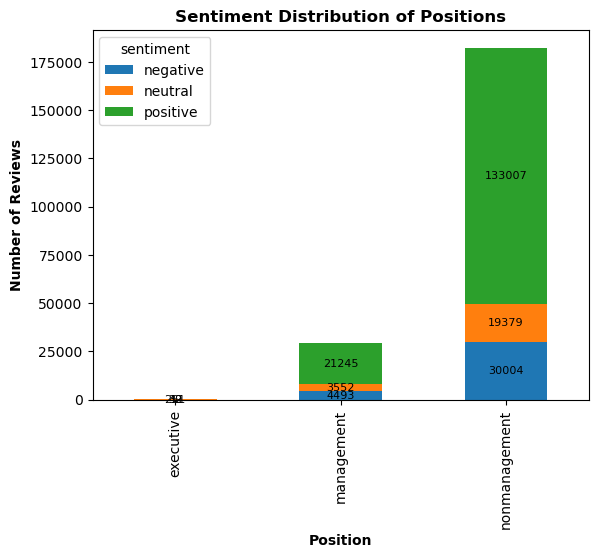

In [89]:
# Group sentiment
position_sentiment = df.groupby(['position', 'sentiment']).size().unstack()

# Create stacked bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size
ax = position_sentiment.plot(kind='bar', stacked=True)

# Annotate bar segment with value
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Skip segments with zero height
    if height > 0:
        ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center', fontsize=8)

plt.xlabel('Position', fontweight='bold')
plt.ylabel('Number of Reviews', fontweight='bold')
plt.title('Sentiment Distribution of Positions', fontweight='bold')
plt.show()

<Figure size 600x600 with 0 Axes>

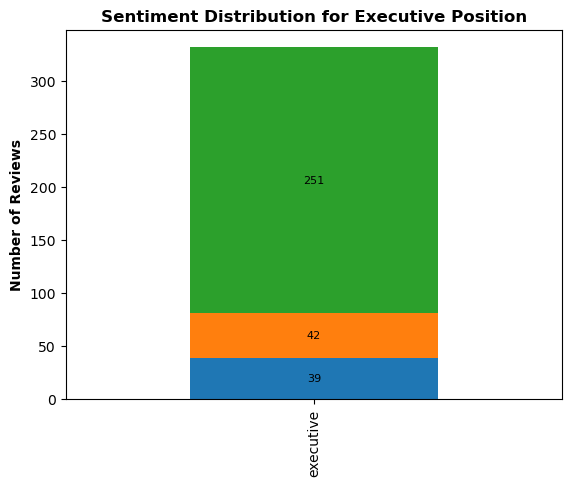

In [91]:
# Create a separate stacked bar chart for executive 
plt.figure(figsize=(6, 6)) 
executive_data = position_sentiment.loc['executive'].to_frame().transpose()
executive_ax = executive_data.plot(kind='bar', stacked=True, legend=None)

# Annotate
for p in executive_ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Skip segments with zero height
    if height > 0:
        executive_ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center', fontsize=8)

plt.ylabel('Number of Reviews', fontweight='bold')
plt.title('Sentiment Distribution for Executive Position', fontweight='bold')
plt.show()

The stacked bar chart depicts the sentiment distribution among Walmart employees in various positions, including Executive, Management, and Non-Management roles. Notably, executives and management positions predominantly garner positive reviews, with executives showing 251 positive, 42 neutral, and 39 negative reviews. Management positions receive 21,245 positive, 3,552 neutral, and 4,493 negative reviews. In the larger category of Non-Management roles, positive sentiments are prevalent, with 133,007 positive, 19,379 neutral, and 30,004 negative reviews. Overall, the chart underscores a predominantly positive sentiment among Walmart employees, particularly in non-management positions, with areas of potential improvement identified in negative sentiment segments.

**Feedback from Milestone 3:** Maybe it would be nice to add some additional qualitative analysis to identify some common features in good/bad reviews? Also, make sure you have a clear conclusion/final analysis in your final writeup.

In [50]:
# Load libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [51]:
# Load the dataset
walmart_df = 'clean_walmart_file.xlsx'
df = pd.read_excel(walmart_df)

In [52]:
# Preprocess the text data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())  
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]  
    return filtered_words

df['clean_reviews'] = df['review'].apply(preprocess_text)

In [53]:
# Extract common themes from positive and negative reviews
positive_reviews = df[df['sentiment'] == 'positive']['clean_reviews']
negative_reviews = df[df['sentiment'] == 'negative']['clean_reviews']

def extract_common_themes(reviews, top_n=10):
    all_words = [word for review_words in reviews for word in review_words]
    freq_dist = FreqDist(all_words)
    common_themes = freq_dist.most_common(top_n)
    return common_themes

# Top common themes in positive reviews
top_positive_themes = extract_common_themes(positive_reviews)

# Top common themes in negative reviews
top_negative_themes = extract_common_themes(negative_reviews)

In [57]:
# Print results
print("Top common themes in positive reviews:")
top_positive_themes

Top common themes in positive reviews:


[('work', 194036),
 ('manag', 90879),
 ('job', 85961),
 ('walmart', 62139),
 ('good', 58530),
 ('custom', 56662),
 ('great', 51889),
 ('time', 45387),
 ('peopl', 44792),
 ('get', 43080)]

These common themes suggest that positive reviews often emphasize the importance of a supportive work environment, effective management, and satisfaction with specific job aspects. The mentions of the company name "Walmart" and positive adjectives like "good" and "great" indicate positive overall sentiments toward the workplace.

In [58]:
print("\nTop common themes in negative reviews:")
top_negative_themes


Top common themes in negative reviews:


[('work', 38151),
 ('manag', 26879),
 ('job', 15728),
 ('get', 12264),
 ('walmart', 12003),
 ('time', 10463),
 ('day', 8940),
 ('custom', 8866),
 ('peopl', 8132),
 ('employe', 7844)]

These common themes suggest that negative reviews often revolve around challenges related to the work itself, managerial practices, and specific job roles. Dissatisfaction with time-related issues and interpersonal dynamics also emerges as notable concerns. The mentions of the company name "Walmart" indicate that negative sentiments may be directed towards the organization as a whole.

In [94]:
# Data for positive reviews
positive_themes = [('work', 194036), ('manag', 90879), ('job', 85961), ('walmart', 62139),
                   ('good', 58530), ('custom', 56662), ('great', 51889), ('time', 45387),
                   ('peopl', 44792), ('get', 43080)]

# Data for negative reviews
negative_themes = [('work', 38151), ('manag', 26879), ('job', 15728), ('get', 12264),
                   ('walmart', 12003), ('time', 10463), ('day', 8940), ('custom', 8866),
                   ('peopl', 8132), ('employe', 7844)]

In [95]:
# Define a set of words that were altered
positive_altered_words = {'peopl', 'manag'}
negative_altered_words = {'peopl', 'manag', 'employe'}

# Extracting themes and counts for plotting
positive_labels, positive_counts = zip(*positive_themes)
negative_labels, negative_counts = zip(*negative_themes)

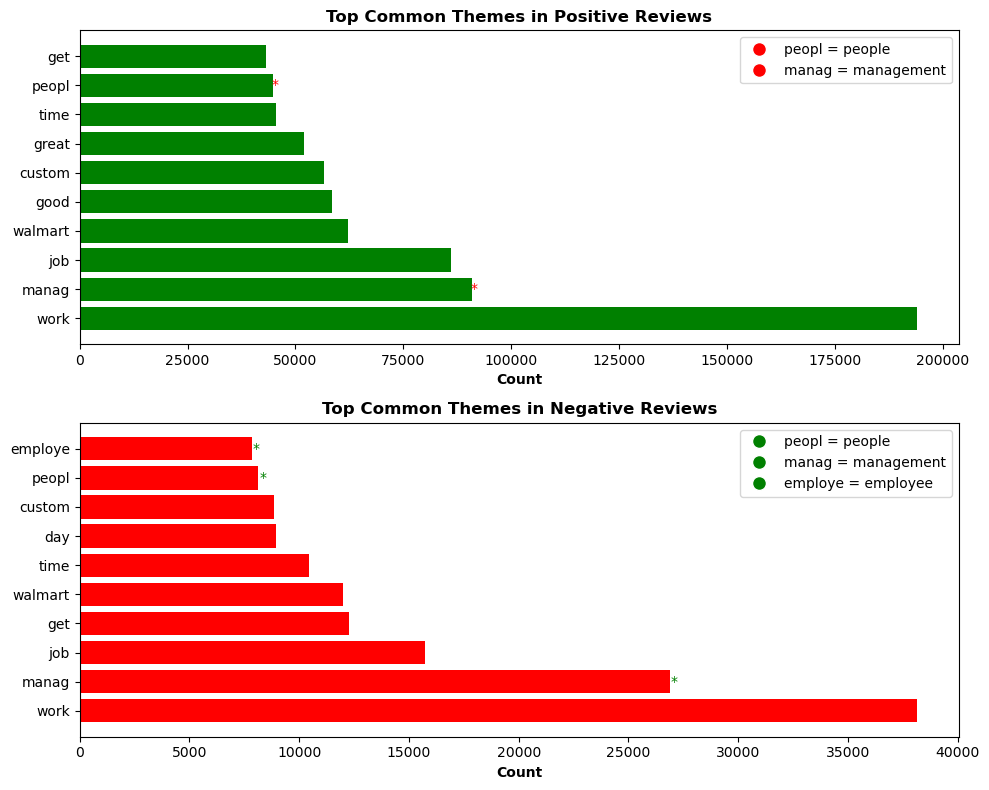

In [100]:
# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Bar chart for positive reviews
positive_bars = axes[0].barh(positive_labels, positive_counts, color='green')

# Add asterisk as a side note for altered words
for bar, label in zip(positive_bars, positive_labels):
    if label in positive_altered_words:
        axes[0].text(bar.get_width() + 500, bar.get_y() + bar.get_height() / 2, '*', ha='center', va='center', color='red')

axes[0].set_title('Top Common Themes in Positive Reviews', fontweight='bold')
axes[0].set_xlabel('Count', fontweight='bold')

# Adding legend for positive chart
positive_legend_labels = {'peopl': 'people', 'manag': 'management'}
positive_legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10,
                                      label=f'{abbreviation} = {full_word}') for abbreviation, full_word in positive_legend_labels.items()]

axes[0].legend(handles=positive_legend_patches, loc='upper right')

# Bar chart for negative reviews
negative_bars = axes[1].barh(negative_labels, negative_counts, color='red')

# Add asterisk as a side note for altered words
for bar, label in zip(negative_bars, negative_labels):
    if label in negative_altered_words:
        axes[1].text(bar.get_width() + 200, bar.get_y() + bar.get_height() / 2, '*', ha='center', va='center', color='green')

axes[1].set_title('Top Common Themes in Negative Reviews', fontweight='bold')
axes[1].set_xlabel('Count', fontweight='bold')

# Adding legend for negative chart
negative_legend_labels = {'peopl': 'people', 'manag': 'management', 'employe': 'employee'}
negative_legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10,
                                      label=f'{abbreviation} = {full_word}') for abbreviation, full_word in negative_legend_labels.items()]

axes[1].legend(handles=negative_legend_patches, loc='upper right')

# Adjust layout for better visualization
plt.tight_layout()

# Print results
plt.show()

**Top 10 Common Themes in Positive Reviews:**

**Work** (194,036 mentions):
Employees in positive reviews frequently mention aspects related to their work, which may include tasks, responsibilities, and the overall work environment.

**Management** (90,879 mentions):
Positive reviews often acknowledge effective or supportive management practices. This could include praise for leadership, communication, or decision-making

**Job** (85,961 mentions):
Employees appreciate positive aspects of their specific job roles, such as interesting tasks, opportunities for growth, or a fulfilling work experience.

**Walmart** (62,139 mentions):
This could indicate a positive sentiment towards the company itself. Employees may express satisfaction with working at Walmart.

**Good** (58,530 mentions):
The general term "good" is commonly used in positive reviews, suggesting an overall positive sentiment without specifying a particular aspect.

**Customer** (56,662 mentions):
Positive reviews may highlight positive interactions with customers or positive feedback related to customer service.

**Great** (51,889 mentions):
Similar to 'good,' the term "great" indicates an overall positive sentiment. Employees may find various aspects of their experience to be excellent.

**Time** (45,387 mentions):
Positive mentions of time could refer to efficient time management, flexible work hours, or a positive work-life balance.

**People** (44,792 mentions):
Positive reviews often recognize the importance of colleagues and teamwork in creating a positive work environment.

**Get** (43,080 mentions):
The term "get" might be related to achieving goals or successfully completing tasks, contributing to a positive experience.

**Top 10 Common Themes in Negative Reviews:**

**Work** (38,151 mentions):
Negative reviews frequently mention issues or challenges related to the actual work, indicating dissatisfaction with job responsibilities, tasks, or the overall work environment.

**Management** (26,879 mentions):
Employees in negative reviews often express discontent with managerial practices. This could involve issues such as poor leadership, communication problems, or ineffective decision-making.

**Job** (15,728 mentions):
Dissatisfaction with specific job roles or responsibilities is a common theme in negative reviews, indicating that employees may find their tasks unfulfilling or problematic.

**Get** (12,264 mentions):
The term "get" in negative reviews may suggest difficulties or challenges in achieving goals or successfully completing tasks, contributing to a negative work experience.

**Walmart** (12,003 mentions):
Negative mentions of the company name "Walmart" indicate dissatisfaction or concerns related to the organization itself.

**Time** (10,463 mentions):
Negative reviews may express dissatisfaction with time-related issues, such as poor time management, inflexible work hours, or an unsatisfactory work-life balance.

**Day** (8,940 mentions):
References to "day" may suggest challenges or dissatisfaction with daily experiences at work, potentially indicating a recurring issue.

**Customer** (8,866 mentions):
Negative reviews may highlight issues or challenges related to customer interactions or negative feedback regarding customer service.

**People** (8,132 mentions):
Dissatisfaction with colleagues or team dynamics is a common theme in negative reviews, indicating that interpersonal relationships may contribute to a negative work environment.

**Employee** (7,844 mentions):
Negative mentions of the term "employee" may suggest overall dissatisfaction with the employment experience, possibly related to company policies or treatment of employees.